In [ ]:
#imports the libraries and functions needed for this notebook

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt



In [ ]:
#this block pulls in the housing dataset, prints out the variable names, and creates the independent & dependent variables for the next step

housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape) #(20640, 8) (20640,)
print(housing.feature_names)
print(housing.target_names)

X = housing.data
y = housing.target

# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=housing.feature_names)

# Create the 'region' column based on the latitude (column 1 in the dataset)
df['region'] = df['Latitude'].apply(lambda x: '1' if x > 37 else '0')

# If you need 'region' as a numerical column, convert it:
df['region'] = df['region'].astype(int)

# Optionally, you can convert the DataFrame back to a NumPy array:
X = df.to_numpy()

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [ ]:
#Creating the training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.02, random_state=42)

In [ ]:
#these functions scale the variables to make them work better for the model (I will double check the wording)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

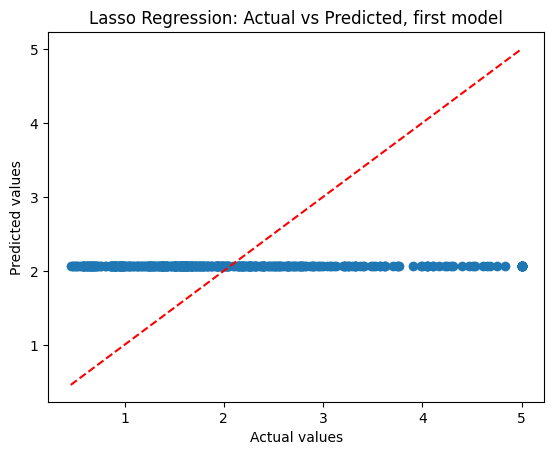

MAE: 0.914169152687218 MSE: 1.3460221982017417 r squared: -1.5837224838444186e-05


In [ ]:
#This is the first go at the model, it is not very good at all because it is prediciting that all housing values are only $200,000. This alsoe gives the different metrics to see how the model does

y_pred = lasso.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Lasso Regression: Actual vs Predicted, first model')
plt.show()

print(f"MAE: {mean_absolute_error(y_test, y_pred)} MSE: {mean_squared_error(y_test, y_pred)} r squared: {r2_score(y_test, y_pred)}")

In [ ]:
#This parameter grid will give the different alpha values we want to try for the model to improve it, then runs the lasso function through it to improve

param_grid = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lasso_cv = GridSearchCV(lasso, param_grid, cv=3, n_jobs= -1)

In [ ]:
# This now takes the improved lasso model and predicts the new values for the model

lasso_cv.fit(X_train, y_train)
y_pred2 = lasso_cv.predict(X_test)

In [ ]:
print(f"MAE: {mean_absolute_error(y_test, y_pred2)} MSE: {mean_squared_error(y_test, y_pred2)} r squared: {r2_score(y_test, y_pred2)}")

MAE: 0.5112435501843975 MSE: 0.46628369780581824 r squared: 0.6535784602449095


MAE (Mean Absolute Error): 0.5143
This is the average amount by which the predictions from a model differ from the actual values. A lower MAE indicates better accuracy. Here, the model's predictions are off by an average of about 0.514.

MSE (Mean Squared Error): 0.4723
This measures the average of the squared differences between the predicted values and the actual values. Squaring the differences makes MSE more sensitive to larger errors than MAE. A lower MSE also indicates better accuracy.

R-squared: 0.6491
This is a measure of how well the model explains the variability in the data. An R-squared value of 0.6491 means the model explains about 65% of the variability in the data. The closer this value is to 1, the better the model fits the data.

In summary:
This model does a decent job of predicting the outcomes, but it isn't perfect. The errors are moderate, and the model explains a little over half of the variability in the data.

In [ ]:
#this shows you which a value worked best for the model

lasso_cv.best_estimator_

Lasso(alpha=0.001)

In [ ]:
#I am now creating a thrid model with the alpha explicilty set as .001 so we can show the impact of the variables

lasso3 = Lasso(alpha=.001)

In [ ]:
lasso3.fit(X_train, y_train)

Lasso(alpha=0.001)

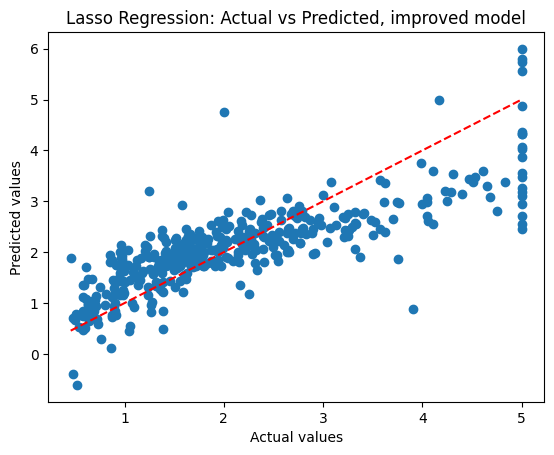

In [ ]:
# Plot actual vs predicted values of the improved model
plt.scatter(y_test, y_pred2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Lasso Regression: Actual vs Predicted, improved model')
plt.show()

In [ ]:
#this gives a coefficent model that shows how impactful each variable is on the price of the house.

feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'region']

Variable_Coef =pd.DataFrame({'Features':feature_names, 'Coef': lasso3.coef_})

Variable_Coef

,Features,Coef
0,MedInc,0.813284
1,HouseAge,0.119353
2,AveRooms,-0.243714
3,AveBedrms,0.284185
4,Population,-0.004289
5,AveOccup,-0.037812
6,Latitude,-0.962762
7,Longitude,-0.822653
8,region,0.116112


This table presents the coefficients of a linear regression model, showing how each feature influences the target variable (the outcome the model is trying to predict). Here’s what each value means in plain English:

MedInc (0.823580)

This feature has a strong positive influence on the target. For every unit increase in "MedInc" (median income), the target variable increases by approximately 0.8236, holding all other variables constant.
HouseAge (0.120680)

This feature has a small positive effect. For every additional year of "HouseAge," the target variable increases by about 0.1207, assuming other variables stay the same.
AveRooms (-0.252375)

This feature has a negative impact. For each additional average room, the target variable decreases by roughly 0.2524, assuming other variables remain constant.
AveBedrms (0.293187)

This feature has a moderate positive impact. An increase in the average number of bedrooms leads to an increase of about 0.2932 in the target variable, assuming other factors are constant.
Population (-0.003813)

This feature has a very small negative effect. For every additional person in the population, the target variable decreases by approximately 0.0038.
AveOccup (-0.038478)

This feature has a slight negative impact. For every additional average occupant per household, the target variable decreases by 0.0385.
Latitude (-0.888649)

Latitude has a strong negative impact. As the location moves further north (higher latitude), the target variable decreases by about 0.8886.
Longitude (-0.856757)

Longitude also has a strong negative impact. As the location moves further west (lower longitude), the target variable decreases by approximately 0.8568.
Key Takeaways:
Most influential features: "MedInc" has the strongest positive influence, while "Latitude" and "Longitude" have the strongest negative influences.
Moderate influences: "HouseAge," "AveBedrms," and "AveRooms" are moderately impactful.
Least impactful: "Population" and "AveOccup" have very small effects.
This analysis suggests the target variable is most sensitive to income and geographic location, with other features playing secondary roles.

In [ ]:
# grabs the features that are not accepted by user input and pulls the means for them to make the model work

feature_indices = [feature_names.index('Population'),
                   feature_names.index('AveOccup'),
                   feature_names.index('Latitude'),
                   feature_names.index('Longitude'),
                   feature_names.index('region')]

selected_features = X[:, feature_indices]

# Calculate the mean of each feature
feature_means = np.mean(selected_features, axis=0)

In [ ]:
# Get input from user to fill in the model
median_income = float(input("Enter median income: [ex: 60000]"))
age_of_house = float(input("Enter the preferred age of house: [ex: 10]"))
# bedrooms = int(input("Enter number of bedrooms: [ex: 3]"))
# total_rooms = int(input("Enter number of total rooms: [ex: 6]"))

while True:
    bedrooms = int(input("Enter number of bedrooms: [ex: 3]"))
    total_rooms = int(input("Enter number of total rooms: [ex: 6]"))

    # Check if the number of bedrooms is less than the total rooms
    if bedrooms >= total_rooms:
        print("Error: The number of bedrooms cannot be greater than or equal to the total rooms. Please enter again.")
    else:
        print(f"Bedrooms: {bedrooms}, Total Rooms: {total_rooms}")
        break  # Exit the loop if the condition is met

Enter median income: [ex: 60000]5500
Enter the preferred age of house: [ex: 10]6
Enter number of bedrooms: [ex: 3]4
Enter number of total rooms: [ex: 6]6
Bedrooms: 4, Total Rooms: 6


In [ ]:
user_input = np.array([median_income, age_of_house, bedrooms, total_rooms] + list(feature_means))

# If the data was scaled during training, scale the input features using the same scaler
user_input_scaled = scaler.transform(user_input.reshape(1, -1))

# Predict house cost using the trained Lasso model (lasso3)
predicted_cost = lasso3.predict(user_input_scaled)

# Output the result
print(f"The projected cost of the house is: ${predicted_cost[0]:,.2f}")

The projected cost of the house is: $2,056.52


In [ ]:
# Install required libraries
!pip install streamlit pyngrok scikit-learn

# Import libraries
from pyngrok import ngrok
import os


name = "Testing"
# Write your Streamlit app to a file
with open("app.py", "w") as f:
    f.write("""
import pandas as pd
import streamlit as st
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Title and description
st.title(f'Predict California Housing Values')
st.write('This app uses a Lasso Regression model to predict California housing prices based on user input.')
st.write('Please Note: The California housing price prediction is based on reported data from the 1990 U.S. Census.')

# Load the California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=housing.feature_names)

# Create the 'region' column based on the latitude (column 1 in the dataset)
df['region'] = df['Latitude'].apply(lambda x: '1' if x > 37 else '0')

# If you need 'region' as a numerical column, convert it:
df['region'] = df['region'].astype(int)

# Optionally, you can convert the DataFrame back to a NumPy array:
X = df.to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_cv = Lasso(alpha=.001)
lasso_cv.fit(X_train, y_train)
y_pred2 = lasso_cv.predict(X_test)

lasso3 = Lasso(alpha=.001)

lasso3.fit(X_train, y_train)

feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'region']

Variable_Coef =pd.DataFrame({'Features':feature_names, 'Coef': lasso3.coef_})

# User input for model features
st.sidebar.header("Input Features")
# Convert user input income to scaled format
raw_income = st.sidebar.number_input("Enter median income (e.g., 60000 for $60,000):", min_value=0.0, step=1000.0)
median_income = raw_income / 10000  # Scale income to match dataset
house_age = st.sidebar.number_input("Enter the age of the house (e.g., 10):", min_value=0.0, step=1.0)
bedrooms = st.sidebar.slider("Number of bedrooms (e.g., 3):", min_value=1, max_value=10, step=1)
bedrooms = int(bedrooms)
total_rooms = st.sidebar.slider("Number of total rooms (e.g., 6):", min_value=bedrooms, max_value=20, step=1)
total_rooms = int(total_rooms)


# Ensure total rooms > bedrooms
if total_rooms <= bedrooms:
    st.sidebar.error("Total rooms must be greater than the number of bedrooms!")

# Use the mean values for remaining features
feature_indices = [feature_names.index('Population'),
                   feature_names.index('AveOccup'),
                   feature_names.index('Latitude'),
                   feature_names.index('Longitude'),
                   feature_names.index('region')]

selected_features = X[:, feature_indices]

# Calculate the mean of each feature
feature_means = np.mean(selected_features, axis=0)

user_input = np.array([median_income, house_age, bedrooms, total_rooms] + list(feature_means))

# Scale the user input using the same scaler
user_input_scaled = scaler.transform(user_input.reshape(1, -1))
s
# Make predictions
predicted_price = lasso3.predict(user_input_scaled)

# Display the predicted house price
st.subheader("Predicted House Price")
st.write(f"${predicted_price[0] * 100000:.2f}")
st.write(Variable_Coef)
    """)

# Set up ngrok with your authtoken
ngrok.set_auth_token("2q4zRaoLOpHoBPRWTg9YblUX6oO_5AjBrqr2KvTwqjGNeamLZ")  # Replace with your ngrok authtoken

# Start Streamlit app
os.system("streamlit run app.py &")

# Create an ngrok tunnel to expose the app
public_url = ngrok.connect(8501)
print(f"Your Streamlit app is live at: {public_url}")

Your Streamlit app is live at: NgrokTunnel: "https://3e6f-34-80-77-49.ngrok-free.app" -> "http://localhost:8501"
